# Support Vector Machine (SVM)
A support Vector Machine is a very powerful MAchine Learning algorithm, capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of ceomplex but small- or medium-sized datasets.

## Linear SVM Classification
The fundamental idea behind SVM is that the two classes can be separeted easily with a straight line (they are linearly separable). You can think of an SVM classifier as a fitting the widest possible street between the classes. It does not  only  separates  the  two  classes  but  also  stays  as  far  away  from  the closest training instances as possible. This is called large margin classification.

Adding more instances "off the street" will not affect the decision boundary at all. It is fully determined (supported) by the instances located on the edge of the street. These instances are called <i>support vectors</i>.

SVMs are sensitive to the feature scales.

### Soft Margin Classification
If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification. It only works if the data is linearly separable, and it is quite sensitive to outliers.

TO avoid this issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violation. This is called <i>soft margin classification</i>.

In Scikit-learn's SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # iris-virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVM classification
Although  linear  SVM  classifiers  are  efficient  and  work  surprisingly  well  in  many cases,  many  datasets  are  not  even  close  to  being  linearly  separable.  One  approach  to handling  nonlinear  datasets  is  to  add  more  features,  such  as  polynomial  features. In  some  cases  this  can  result  in  a  linearly  separable  dataset.

To  implement  this  idea  using  Scikit-Learn,  you  can  create  a  Pipeline  containing  a PolynomialFeatures  transformer followed  by  a  StandardScaler  and  a  LinearSVC.  Let’s  test  this  on  the  moons dataset: this is a toy dataset for binary classification in which the data points are shaped  as  two  interleaving  half  circles.

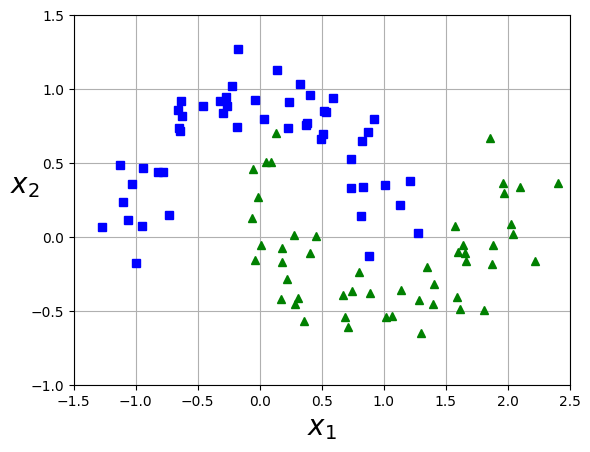

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [7]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)


c:\Users\m.olszanski\Desktop\Bench_projects\ML_basics\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

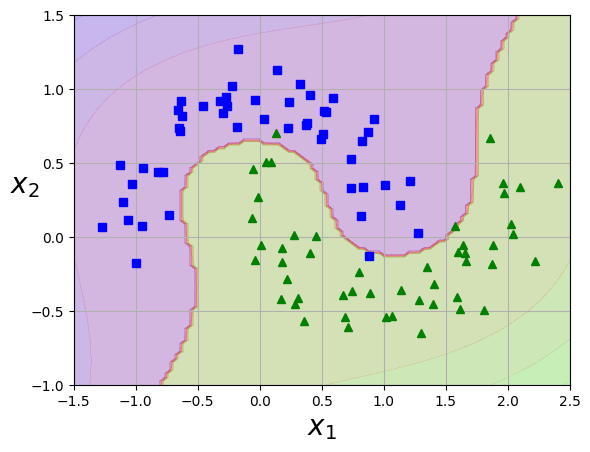

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()